# Data loading

We start by importing the packages and data.

In [10]:
%matplotlib inline
import scanpy.preprocessing
import scanpy.plotting
import scanpy.tools
import matplotlib.pyplot as plt
import scipy.stats
import pandas
import numpy
import sklearn.discriminant_analysis

adata = scanpy.read_h5ad("../../Data/all_data.h5ad")

We make a quick heatmap to check whether the data looks sensible:

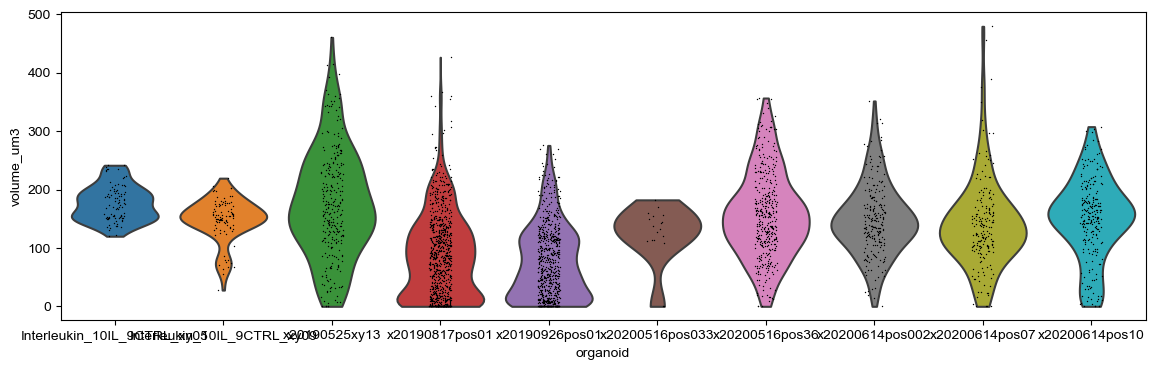

In [11]:
figure = plt.figure(figsize=(14, 4))
ax = figure.gca()
scanpy.plotting.violin(adata,
                       ax=ax,
                       keys=["volume_um3"], 
                       groupby="organoid")

We filter out cells with a suspiciously low or high volume: (indicating missegmentation)

In [12]:
adata = adata[adata[: , 'volume_um3'].X > 100, :]
adata = adata[adata[: , 'volume_um3'].X < 250, :]

We also filter to remove cells without a cell type:

In [13]:
adata = adata[adata.obs["cell_type_training"] != "NONE"]

# Start of analysis

Now we normalize the data:

In [14]:
scanpy.preprocessing.log1p(adata)
scanpy.preprocessing.scale(adata)

d:\miniconda\envs\organoid_tracker\lib\site-packages\scanpy\preprocessing\_simple.py:373: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


We also define a cell type palette that we will use everywhere:

In [15]:
cell_type_palette = {
    "ENTEROCYTE": "#100069",
    "OTHER_DIFFERENTIATED": "#100069",
    "ABSORPTIVE_PROGENY": "#0984e3",
    "SECRETORY": "#74b9ff",
    "ENTEROENDOCRINE": "#74b9ff",
    "GOBLET": "#74b9ff",
    "MATURE_GOBLET": "#74b9ff",
    "SECRETIVE_PROGENY": "#74b9ff",
    "WGA_PLUS": "#74b9ff",
    "OTHER_SECETORY": "#74b9ff",
    "PANETH": "#B60101",
    "STEM": "#26CC3C",
    "STEM_PUTATIVE": "#26CC3C",
    "UNLABELED": "#eeeeee",
    "TA": "#eeeeee",
    "NONE": "#ffffff"
}

Next, we plot the highly variable "genes" (or actually, nucleus parameters.)

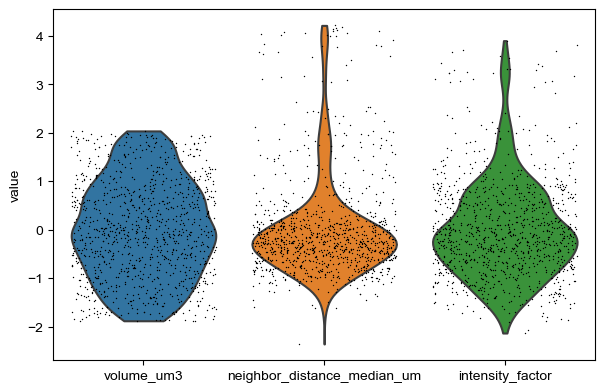

In [16]:

scanpy.plotting.violin(adata, ['volume_um3', 'neighbor_distance_median_um', 'intensity_factor'],
             jitter=0.4)


Next, we perform and plot the PCA:

d:\miniconda\envs\organoid_tracker\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


<AxesSubplot: title={'center': 'cell_type_training'}, xlabel='PC3 (12.4%)', ylabel='PC4 (8.24%)'>

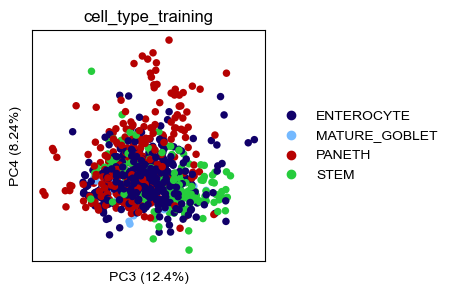

In [23]:
scanpy.tools.pca(adata, svd_solver='arpack')
fig = plt.figure(figsize=(3, 3))
scanpy.plotting.pca(adata, ax=fig.gca(), annotate_var_explained=True, color="cell_type_training", palette=cell_type_palette, show=False,
                    dimensions=[(2,3)])

And show the elbow plot:

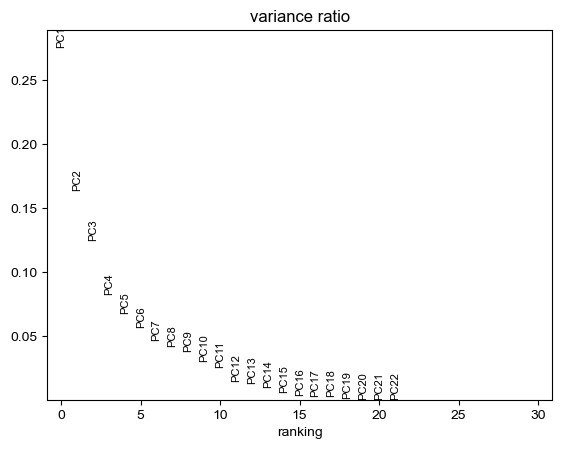

In [20]:
scanpy.plotting.pca_variance_ratio(adata, log=False)

d:\miniconda\envs\organoid_tracker\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


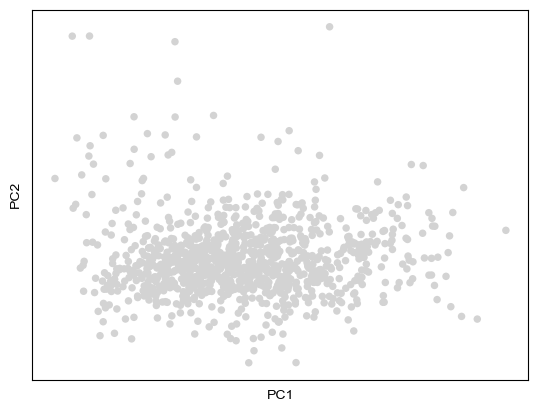

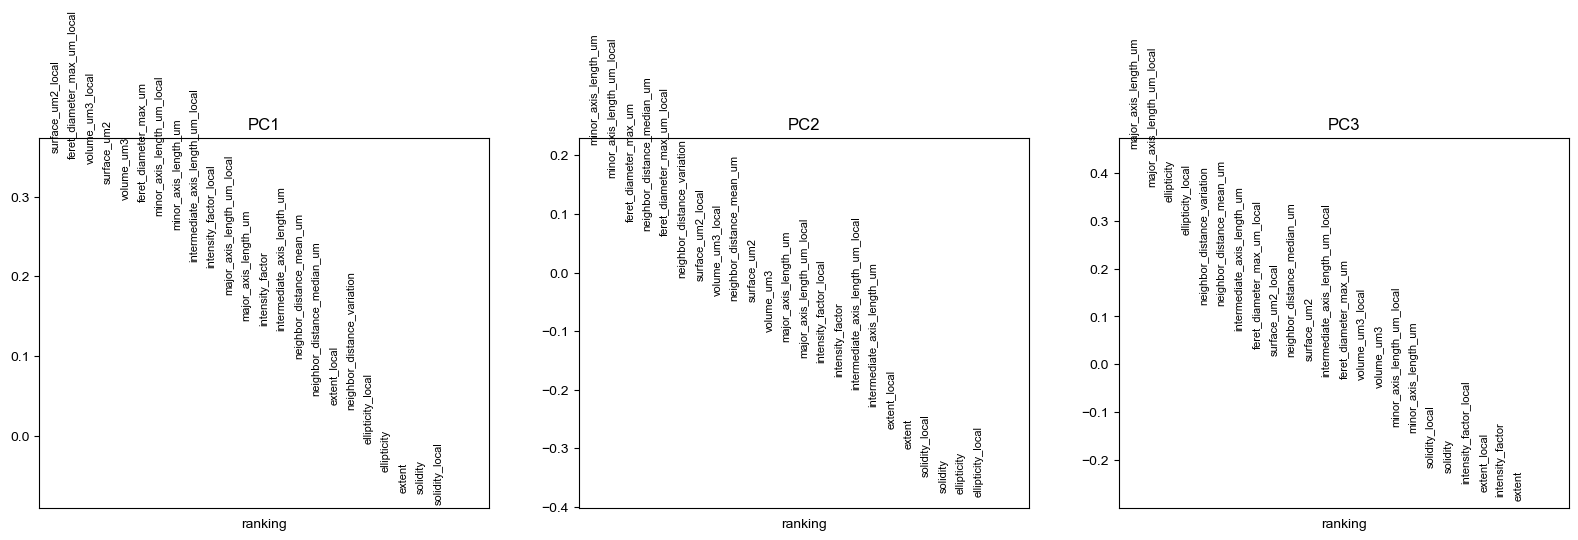

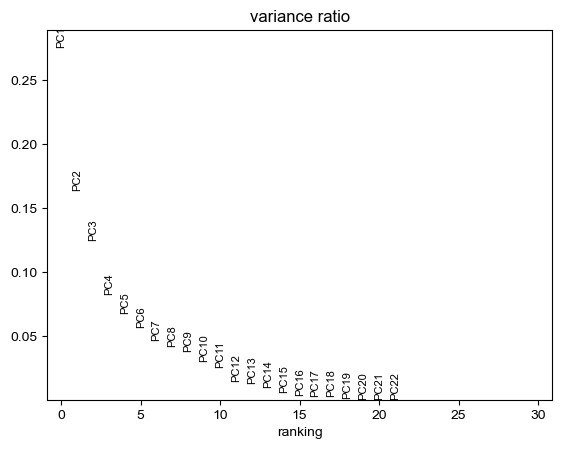

In [19]:
scanpy.plotting.pca_overview(adata)

# LDA plot

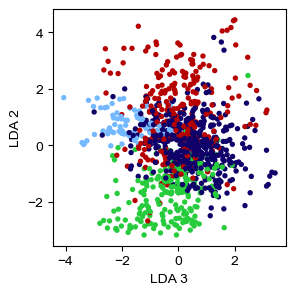

In [49]:
lda = sklearn.discriminant_analysis.LinearDiscriminantAnalysis()
plot_coords = lda.fit(adata.X, adata.obs["cell_type_training"]).transform(adata.X)

fig = plt.figure(figsize=(3, 4))
ax = fig.gca()

dimensions = (2, 1)
ax.scatter(plot_coords[:, dimensions[0]], plot_coords[:, dimensions[1]],
           alpha=1, s=15, lw=0,
           color=[cell_type_palette[adata.obs["cell_type_training"][i]] for i in range(len(adata_with_type.obs["cell_type_training"]))])
ax.set_xlabel(f"LDA {dimensions[0] + 1}")
ax.set_ylabel(f"LDA {dimensions[1] + 1}")
ax.set_aspect(1)

# UMAP clustering
Do UMAP clustering:

In [25]:
scanpy.preprocessing.neighbors(adata, n_pcs=10)
scanpy.tools.umap(adata)


And make some plots out of it:

d:\miniconda\envs\organoid_tracker\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


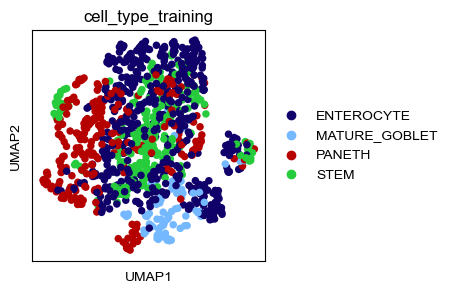

In [26]:
fig = plt.figure(figsize=(3, 3))
scanpy.plotting.umap(adata, color="cell_type_training", ax=fig.gca(), palette=cell_type_palette)

d:\miniconda\envs\organoid_tracker\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


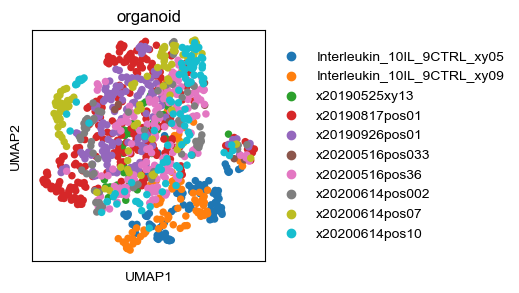

In [27]:
fig = plt.figure(figsize=(3, 3))
scanpy.plotting.umap(adata, color="organoid", ax=fig.gca())

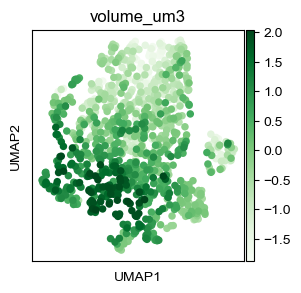

In [28]:
fig = plt.figure(figsize=(3, 3))
scanpy.plotting.umap(adata, color="volume_um3", color_map="Greens", ax=fig.gca())

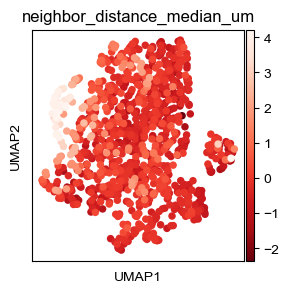

In [29]:
fig = plt.figure(figsize=(3, 3))
scanpy.plotting.umap(adata, color="neighbor_distance_median_um", color_map="Reds_r", ax=fig.gca())

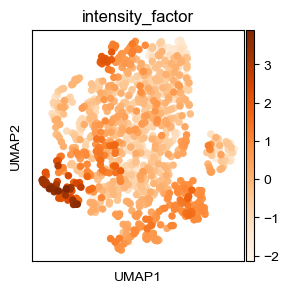

In [30]:
fig = plt.figure(figsize=(3, 3))
scanpy.plotting.umap(adata, color="intensity_factor", color_map="Oranges", ax=fig.gca())

# Most important variables for each cell type

d:\miniconda\envs\organoid_tracker\lib\site-packages\scanpy\plotting\_anndata.py:2414: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  obs_tidy.index.value_counts(sort=False).iteritems()


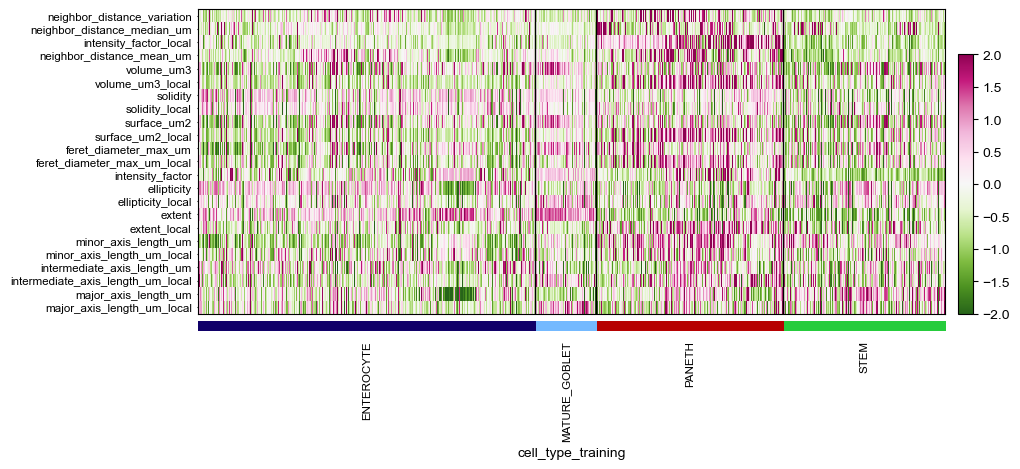

In [31]:
scanpy.plotting.heatmap(adata,
                        var_names=adata.var_names, 
                        groupby="cell_type_training", 
                        cmap="PiYG_r", 
                        swap_axes=True, 
                        vmin=-2,
                        vmax=2,
                        save="heatmap.svg")


d:\miniconda\envs\organoid_tracker\lib\site-packages\scanpy\tools\_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
d:\miniconda\envs\organoid_tracker\lib\site-packages\scanpy\tools\_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
d:\miniconda\envs\organoid_tracker\lib\site-packages\scanpy\tools\_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
d:\miniconda\envs\organoid_tracker\lib\site-packages\scanpy\tools\_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(


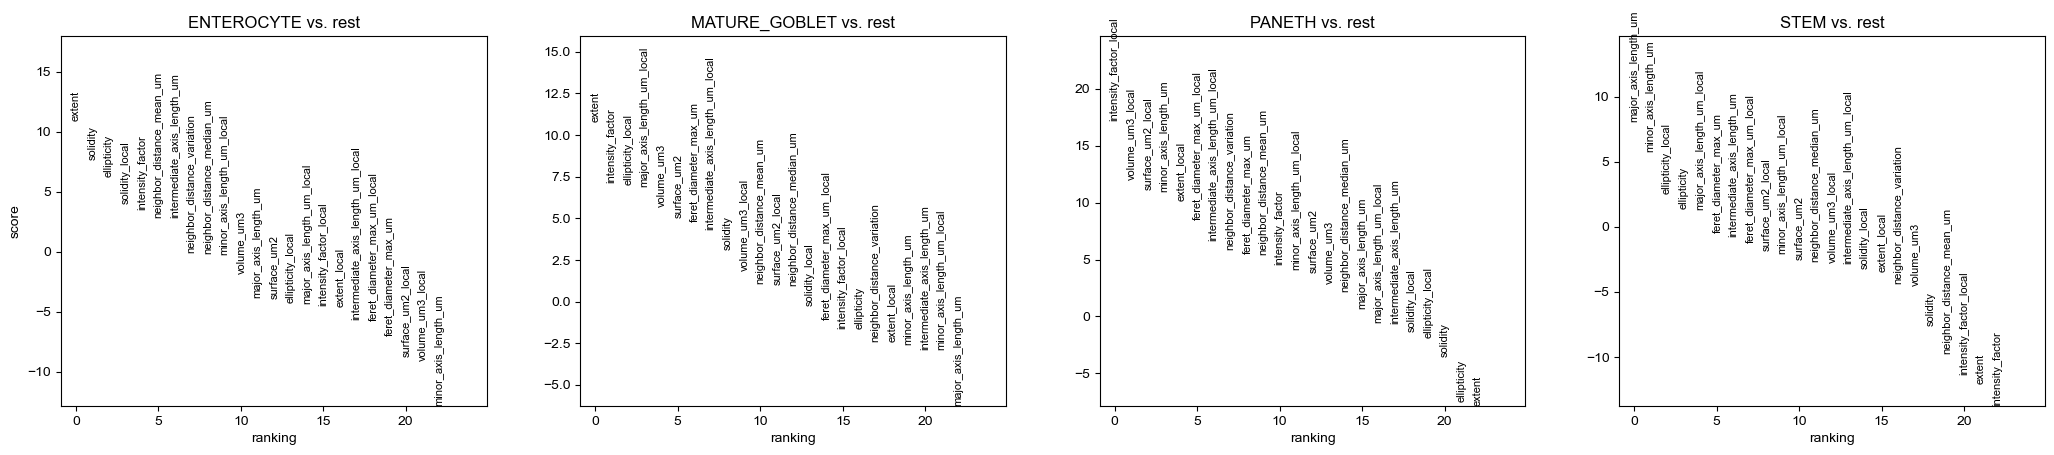

In [32]:
scanpy.tools.rank_genes_groups(adata, 'cell_type_training', method='wilcoxon')
scanpy.plotting.rank_genes_groups(adata, n_genes=25, sharey=False)

Define a p-adjust function:

In [33]:
def p_adjust_benjamini_hochberg(p_values):
    """Benjamini-Hochberg p-value correction for multiple hypothesis testing."""
    p_values = numpy.array(p_values)
    by_descend = p_values.argsort()[::-1]
    by_orig = by_descend.argsort()
    steps = float(len(p_values)) / numpy.arange(len(p_values), 0, -1)
    q_values = numpy.minimum(1, numpy.minimum.accumulate(steps * p_values[by_descend]))
    return q_values[by_orig]

In [34]:
# Use Anova to find variables that are significantly different among groups
groups_by_type = adata.obs.groupby("cell_type_training").indices

rows = list()
for i, var_name in enumerate(adata.var_names):
    values_by_cell_type = list()
    for cell_type, indices in groups_by_type.items():
        values_by_cell_type.append(adata_with_type.X[indices, i])
    f_stat, p_value = scipy.stats.f_oneway(*values_by_cell_type)
    rows.append((var_name, p_value))

data_frame = pandas.DataFrame(rows, columns=["var_name", "p_value"]).sort_values("p_value")

# Adjust the p values
data_frame["p_value"] = p_adjust_benjamini_hochberg(data_frame["p_value"])

print(data_frame)


                             var_name       p_value
2              intensity_factor_local  3.260415e-95
15                             extent  1.046755e-79
17               minor_axis_length_um  3.300240e-53
5                    volume_um3_local  5.169505e-49
9                   surface_um2_local  4.768574e-41
12                   intensity_factor  1.261420e-38
3           neighbor_distance_mean_um  2.959411e-25
16                       extent_local  3.264629e-24
21               major_axis_length_um  1.213413e-20
11        feret_diameter_max_um_local  1.406489e-20
20  intermediate_axis_length_um_local  2.420418e-18
0         neighbor_distance_variation  5.768081e-18
6                            solidity  6.149363e-16
10              feret_diameter_max_um  2.940360e-14
13                        ellipticity  1.678832e-11
4                          volume_um3  3.379507e-11
22         major_axis_length_um_local  8.310133e-11
14                  ellipticity_local  1.450852e-09
8           

In [35]:
most_important_variables = list(data_frame["var_name"][0:10])
print(most_important_variables)

['intensity_factor_local', 'extent', 'minor_axis_length_um', 'volume_um3_local', 'surface_um2_local', 'intensity_factor', 'neighbor_distance_mean_um', 'extent_local', 'major_axis_length_um', 'feret_diameter_max_um_local']
